In [1]:
#Dependencies
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
#Read Ad-Level Master File
df = pd.read_csv("School_Master_DropNA.csv")
df.head()

,school_id,kcal,fat_g,carb_g,protien_g,sodium_mg,fiber_g,sugar_g,type_ms-0,Campus_Name,...,Prct_EcoDis,Greater60PrctEcoDis,Prct_Hispanic,Prct_Black,Prct_White,Prct_Asian_Other,Prct_Nonwhite,Count_Sec8,Count_HACA_HOUSING,Count_APT
0,227901043,0.000,0.000,0.000,0.000,6.518,0.000,0.000,0,FULMORE MIDDLE,...,77.1,1,71.48,9.35,16.15,3.02,83.85,3,0,5
1,227901043,859.608,29.539,122.891,23.919,1542.156,5.837,3.993,0,FULMORE MIDDLE,...,77.1,1,71.48,9.35,16.15,3.02,83.85,3,0,5
2,227901043,116.000,0.210,28.230,0.640,98.000,0.000,25.950,0,FULMORE MIDDLE,...,77.1,1,71.48,9.35,16.15,3.02,83.85,3,0,5
3,227901043,12.500,0.200,1.750,0.625,200.000,0.000,0.000,0,FULMORE MIDDLE,...,77.1,1,71.48,9.35,16.15,3.02,83.85,3,0,5
4,227901043,261.512,9.071,31.476,12.818,520.129,1.565,5.868,0,FULMORE MIDDLE,...,77.1,1,71.48,9.35,16.15,3.02,83.85,3,0,5


In [3]:
#Calculate Sums for Relevant Variables
df.groupby("Campus_Name").kcal.sum()

Campus_Name
Anderson                 6694.987000
Austin                   9916.597000
BEDICHEK MIDDLE         47143.054000
BURNET MIDDLE           48295.694000
COVINGTON MIDDLE         6326.308000
Crockett                14723.867000
DOBIE MIDDLE            30508.263000
FULMORE MIDDLE          23812.533000
Garza                   19395.584083
Johnson (LBJ)           49935.653000
LAMAR MIDDLE             1093.860000
Lanier                  50569.734167
MARTIN MIDDLE            3395.483000
MENDEZ MIDDLE           18435.104000
MURCHISON MIDDLE        28657.194000
McCallum                25311.081167
O HENRY MIDDLE           5882.878000
Reagan                 182554.290000
SMALL MIDDLE SCHOOL     18362.917000
Travis                 117162.935000
WEBB MIDDLE             67447.474000
Name: kcal, dtype: float64

In [4]:
df.groupby("Campus_Name").fat_g.sum()

Campus_Name
Anderson                264.373000
Austin                  291.421000
BEDICHEK MIDDLE        1975.985000
BURNET MIDDLE          1375.096000
COVINGTON MIDDLE        358.074000
Crockett                480.432000
DOBIE MIDDLE            877.771000
FULMORE MIDDLE          973.098000
Garza                   876.819667
Johnson (LBJ)          2070.684000
LAMAR MIDDLE             27.580000
Lanier                 2067.671500
MARTIN MIDDLE           168.178000
MENDEZ MIDDLE           664.924000
MURCHISON MIDDLE        751.841000
McCallum               1367.339500
O HENRY MIDDLE          192.477000
Reagan                 4038.961000
SMALL MIDDLE SCHOOL     412.056000
Travis                 3520.549000
WEBB MIDDLE            3079.232000
Name: fat_g, dtype: float64

In [5]:
df.groupby("Campus_Name").sugar_g.sum()

Campus_Name
Anderson                 273.453000
Austin                   957.772000
BEDICHEK MIDDLE         2154.624000
BURNET MIDDLE           5568.327000
COVINGTON MIDDLE         159.045000
Crockett                1228.255000
DOBIE MIDDLE            3657.681000
FULMORE MIDDLE          1096.127000
Garza                   1013.194750
Johnson (LBJ)           4046.987500
LAMAR MIDDLE              24.885000
Lanier                  4144.134833
MARTIN MIDDLE            338.812000
MENDEZ MIDDLE           1948.844000
MURCHISON MIDDLE        4378.845000
McCallum                3297.682667
O HENRY MIDDLE           394.409000
Reagan                 26880.916000
SMALL MIDDLE SCHOOL     2907.140000
Travis                 13898.690000
WEBB MIDDLE             6321.918000
Name: sugar_g, dtype: float64

In [6]:
df.groupby("Campus_Name").sodium_mg.sum()

Campus_Name
Anderson                13328.932000
Austin                  15937.989000
BEDICHEK MIDDLE         92857.144000
BURNET MIDDLE           59119.796000
COVINGTON MIDDLE        11386.254000
Crockett                24849.954500
DOBIE MIDDLE            32958.942000
FULMORE MIDDLE          48688.754000
Garza                   30470.065667
Johnson (LBJ)          103370.212000
LAMAR MIDDLE             4230.877000
Lanier                  82793.297167
MARTIN MIDDLE            2692.662000
MENDEZ MIDDLE           19873.716000
MURCHISON MIDDLE        18088.660000
McCallum                26096.695167
O HENRY MIDDLE          11278.514000
Reagan                 221879.766500
SMALL MIDDLE SCHOOL     17997.194000
Travis                 147979.168000
WEBB MIDDLE             74117.209000
Name: sodium_mg, dtype: float64

In [7]:
#After Manually Appending School-Level Master File with Above Sums, Import File
df_lvl = pd.read_csv('School_Meta_DNA_Macro.csv')
df_lvl.head()

,Campus_Name,school_id,sum_kcal,sum_sugar,sum_sodium,sum_fat,mean_kcal,mean_sodium_mg,mean_sugar_mg,Students,...,Prct_Hispanic,Prct_Black,Prct_White,Prct_Asian_Other,Prct_Nonwhite,Count_Sec8,Count_HACA_HOUSING,Count_APT,Rank_TotAds,Rank_Prct_EcoDis
0,Anderson,300000002,6694.99,273.45,13328.93,264.37,418.44,833.06,17.09,1997,...,27.28,7.84,55.99,8.89,44.01,0,0,2,19,21
1,Austin,300000004,9916.60,957.77,15937.98,291.42,260.96,419.42,25.20,"2,296",...,44.97,7.17,43.44,4.41,56.56,0,0,2,14,18
2,BEDICHEK MIDDLE,227901054,47143.05,2154.62,92857.14,1975.98,476.19,937.95,21.76,"1,021",...,80.88,8.36,9.51,1.25,90.49,33,0,5,9,10
3,BURNET MIDDLE,227901046,48295.69,5568.32,59119.79,1375.09,427.40,523.19,49.28,960,...,78.09,13.79,5.57,2.55,94.43,13,0,3,4,5
4,COVINGTON MIDDLE,227901057,6326.31,159.04,11386.25,358.07,421.75,759.08,10.60,951,...,61.03,9.64,25.10,4.23,74.90,7,0,2,5,12


In [8]:
#Push Variables to Arrays For SciPy Testing
sum_kcal = df_lvl["sum_kcal"].tolist()

sum_fat = df_lvl["sum_fat"].tolist()

sum_sodium_mg = df_lvl["sum_sodium"].tolist()

sum_sugar_g = df_lvl["sum_sugar"].tolist()

Prct_EcoDis = df_lvl["Prct_EcoDis"].tolist()

total_ads = df_lvl["TotalAds"].tolist()

obese = df_lvl["Sum_O"].tolist()

In [9]:
#After Manually Performing Low-High %EDS Split in Excel, Past in Arrays
totalads_LowEcoDis = [80,
133,
125,
124,
150,
117,
58,
44,
]

totalads_HighEcoDis = [173,
293,
234,
88,
143,
655,
169,
228,
213,
175,
520,
332,
172,
]

In [10]:
sum_kcal_LowEcoDis = [6694.99,
9916.6,
19395.58,
1093.86,
25311.08,
28657.19,
5882.87,
18362.91,
]

sum_kcal_HighEcoDis = [47143.05,
48295.69,
6326.31,
14723.87,
30508.26,
23812.53,
49935.65,
50569.73,
3395.48,
18435.1,
182554.29,
117162.93,
67447.47,
]

In [11]:
sum_fat_LowEcoDis = [264.37,
291.42,
876.8,
27.58,
1367.33,
751.84,
192.47,
412.05,
]

sum_fat_HighEcoDis = [1975.98,
1375.09,
358.07,
480.43,
877.77,
973.09,
2070.68,
2067.67,
168.17,
664.92,
4038.96,
3520.54,
3079.23,
]

In [12]:
sum_sugar_LowEcoDis = [273.45,
957.77,
1013.19,
24.88,
3297.68,
4378.84,
394.4,
2907.14,
]

sum_sugar_HighEcoDis = [2154.62,
5568.32,
159.04,
1228.25,
3657.68,
1096.12,
4046.98,
4144.13,
338.81,
1948.84,
26880.91,
13898.69,
6321.91,
]

In [13]:
sum_sodium_LowEcoDis = [13328.93,
15937.98,
30470.06,
4230.87,
26096.69,
18088.66,
11278.51,
17997.19,

]

sum_sodium_HighEcoDis = [92857.14,
59119.79,
11386.25,
24849.95,
32958.94,
48688.75,
103370.21,
82793.29,
2692.66,
19873.71,
221879.76,
147979.16,
74117.2,
]

In [14]:
#First, Coorelationm Tests for Significance
stats.shapiro(Prct_EcoDis)

(0.8555977940559387, 0.005311982240527868)

In [15]:
stats.spearmanr(Prct_EcoDis, obese)

SpearmanrResult(correlation=0.8337662337662338, pvalue=2.6652061559546094e-06)

In [16]:
stats.spearmanr(Prct_EcoDis, total_ads)

SpearmanrResult(correlation=0.6623376623376622, pvalue=0.0010706809556016237)

In [17]:
stats.spearmanr(Prct_EcoDis, sum_kcal)

SpearmanrResult(correlation=0.47922077922077916, pvalue=0.027944448062011996)

In [18]:
stats.spearmanr(Prct_EcoDis, sum_fat)

SpearmanrResult(correlation=0.4896103896103896, pvalue=0.024270522021007414)

In [19]:
stats.spearmanr(Prct_EcoDis, sum_sugar_g)

SpearmanrResult(correlation=0.43376623376623374, pvalue=0.04946747938154749)

In [20]:
stats.spearmanr(Prct_EcoDis, sum_sodium_mg)

SpearmanrResult(correlation=0.4727272727272727, pvalue=0.030455231601954364)

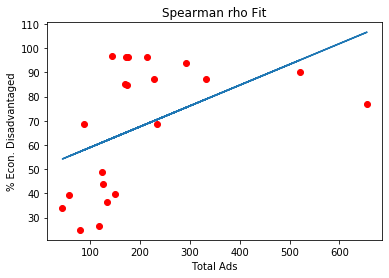

In [21]:
#Visualize Coorelations
#Total Ads
fit = np.polyfit(total_ads, Prct_EcoDis, 1)
fit_fn = np.poly1d(fit) 
plt.plot(total_ads, Prct_EcoDis, 'ro', total_ads, fit_fn(total_ads))
plt.title('Spearman rho Fit')
plt.xlabel('Total Ads')
plt.ylabel('% Econ. Disadvantaged')
plt.show()

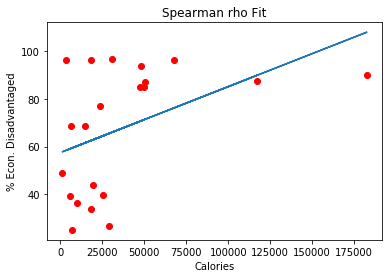

In [22]:
#Calories
fit1 = np.polyfit(sum_kcal, Prct_EcoDis, 1)
fit_fn1 = np.poly1d(fit1) 
plt.plot(sum_kcal, Prct_EcoDis, 'ro', sum_kcal, fit_fn1(sum_kcal))
plt.title('Spearman rho Fit')
plt.xlabel('Calories')
plt.ylabel('% Econ. Disadvantaged')
plt.show()

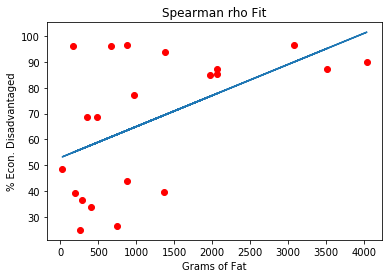

In [23]:
#Fat
fit2 = np.polyfit(sum_fat, Prct_EcoDis, 1)
fit_fn2 = np.poly1d(fit2) 
plt.plot(sum_fat, Prct_EcoDis, 'ro', sum_fat, fit_fn2(sum_fat))
plt.title('Spearman rho Fit')
plt.xlabel('Grams of Fat')
plt.ylabel('% Econ. Disadvantaged')
plt.show()

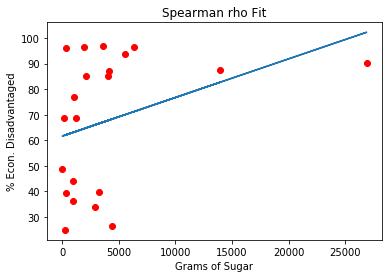

In [24]:
#Sugar
fit3 = np.polyfit(sum_sugar_g, Prct_EcoDis, 1)
fit_fn3 = np.poly1d(fit3) 
plt.plot(sum_sugar_g, Prct_EcoDis, 'ro', sum_sugar_g, fit_fn3(sum_sugar_g))
plt.title('Spearman rho Fit')
plt.xlabel('Grams of Sugar')
plt.ylabel('% Econ. Disadvantaged')
plt.show()

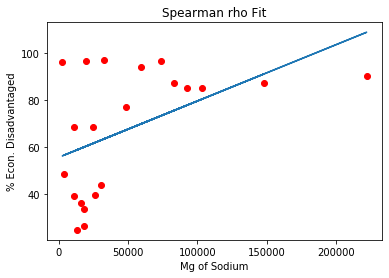

In [25]:
#Sodium
fit4 = np.polyfit(sum_sodium_mg, Prct_EcoDis, 1)
fit_fn4 = np.poly1d(fit4) 
plt.plot(sum_sodium_mg, Prct_EcoDis, 'ro', sum_sodium_mg, fit_fn4(sum_sodium_mg))
plt.title('Spearman rho Fit')
plt.xlabel('Mg of Sodium')
plt.ylabel('% Econ. Disadvantaged')
plt.show()

In [26]:
#Next, Difference in Means Text for Significancce
#Totalads
stats.shapiro(totalads_HighEcoDis)

(0.8078746199607849, 0.008467649109661579)

In [27]:
stats.mannwhitneyu(totalads_LowEcoDis, totalads_HighEcoDis)

MannwhitneyuResult(statistic=6.0, pvalue=0.0004918614474256409)

In [28]:
stats.describe(totalads_LowEcoDis)

DescribeResult(nobs=8, minmax=(44, 150), mean=103.875, variance=1465.5535714285713, skewness=-0.49576589850496083, kurtosis=-1.2330682794552092)

In [29]:
stats.describe(totalads_HighEcoDis)

DescribeResult(nobs=13, minmax=(88, 655), mean=261.15384615384613, variance=25656.807692307688, skewness=1.4562253385985675, kurtosis=1.1043978154499632)

In [30]:
#KCal
stats.shapiro(sum_kcal_LowEcoDis)

(0.9413648843765259, 0.6245577335357666)

In [31]:
stats.shapiro(sum_kcal_HighEcoDis)

(0.8057581186294556, 0.007985619828104973)

In [32]:
stats.mannwhitneyu(sum_kcal_LowEcoDis, sum_kcal_HighEcoDis)

MannwhitneyuResult(statistic=22.0, pvalue=0.016322999466619314)

In [33]:
stats.describe(sum_kcal_LowEcoDis)

DescribeResult(nobs=8, minmax=(1093.86, 28657.19), mean=14414.385, variance=98862981.86254287, skewness=0.12937968800380079, kurtosis=-1.3821904298747547)

In [34]:
stats.describe(sum_kcal_HighEcoDis)

DescribeResult(nobs=13, minmax=(3395.48, 182554.29), mean=50793.104615384604, variance=2481246983.635294, skewness=1.6008920125967658, kurtosis=1.8878228662381389)

In [35]:
#Fat
stats.shapiro(sum_fat_LowEcoDis)

(0.909132182598114, 0.34799304604530334)

In [36]:
stats.shapiro(sum_fat_HighEcoDis)

(0.9166656136512756, 0.22608600556850433)

In [37]:
stats.ttest_ind(sum_fat_LowEcoDis, sum_fat_HighEcoDis)

Ttest_indResult(statistic=-2.4527315108723795, pvalue=0.024011003127725764)

In [38]:
stats.describe(sum_fat_HighEcoDis)

DescribeResult(nobs=13, minmax=(168.17, 4038.96), mean=1665.4307692307693, variance=1586386.441641026, skewness=0.5921830888136683, kurtosis=-0.8769965917082003)

In [39]:
stats.describe(sum_fat_LowEcoDis)

DescribeResult(nobs=8, minmax=(27.58, 1367.33), mean=522.9825000000001, variance=196850.7235928571, skewness=0.820915907251157, kurtosis=-0.44532574128675506)

In [40]:
#Sugar
stats.shapiro(sum_sugar_LowEcoDis)

(0.8684771060943604, 0.14564107358455658)

In [41]:
stats.shapiro(sum_sugar_HighEcoDis)

(0.687221109867096, 0.00041466488619334996)

In [42]:
stats.mannwhitneyu(sum_sugar_LowEcoDis, sum_sugar_HighEcoDis)

MannwhitneyuResult(statistic=28.0, pvalue=0.0443883668565458)

In [43]:
stats.describe(sum_sugar_LowEcoDis)

DescribeResult(nobs=8, minmax=(24.88, 4378.84), mean=1655.9187500000003, variance=2676954.782955357, skewness=0.5919992684194657, kurtosis=-1.214751266207796)

In [44]:
stats.describe(sum_sugar_HighEcoDis)

DescribeResult(nobs=13, minmax=(159.04, 26880.91), mean=5495.715384615385, variance=54359426.03882692, skewness=2.1269863323920184, kurtosis=3.619281895636469)

In [45]:
#Sodium
stats.shapiro(sum_sodium_LowEcoDis)

(0.9712640643119812, 0.9077391028404236)

In [46]:
stats.shapiro(sum_sodium_HighEcoDis)

(0.8937978744506836, 0.1099453940987587)

In [47]:
stats.ttest_ind(sum_sodium_LowEcoDis, sum_sodium_HighEcoDis)

Ttest_indResult(statistic=-2.435604947631953, pvalue=0.02488715382805873)

In [48]:
stats.describe(sum_sodium_HighEcoDis)

DescribeResult(nobs=13, minmax=(2692.66, 221879.76), mean=70966.67769230768, variance=3784526029.132952, skewness=1.1590469970405504, kurtosis=0.8022965121736907)

In [49]:
stats.describe(sum_sodium_LowEcoDis)

DescribeResult(nobs=8, minmax=(4230.87, 30470.06), mean=17178.611249999998, variance=68072486.88924107, skewness=0.16960040406939117, kurtosis=-0.6367582182970435)

In [50]:
#ML to predict if an add was located closest to a high or low %EDS school based on macronutrient content.
from sklearn import tree
df_tree = pd.read_csv("School_Master_trees.csv")
target = df_tree["Greater60PrctEcoDis"]
target_names = [0, 1]
data = df_tree.drop("Greater60PrctEcoDis", axis=1)
feature_names = data.columns
data.head()

,kcal,fat_g,carb_g,sodium_mg,sugar_g
0,0.000,0.000,0.000,6.518,0.000
1,859.608,29.539,122.891,1542.156,3.993
2,116.000,0.210,28.230,98.000,25.950
3,12.500,0.200,1.750,200.000,0.000
4,261.512,9.071,31.476,520.129,5.868


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [52]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.798941798941799

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8271604938271605

In [55]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.21988108102544282, 'kcal'),
 (0.21631733617613322, 'sodium_mg'),
 (0.2033603931290717, 'carb_g'),
 (0.19096742429802832, 'fat_g'),
 (0.16947376537132397, 'sugar_g')]